# Online Food Dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

[Данные](https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset)

In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Инициализация API
api = KaggleApi()
api.authenticate()

# Путь для сохранения набора данных
dataset_path = 'Data/Online_Food_Dataset/'

if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)

# Скачивание и распаковка набора данных
api.dataset_download_files('sudarshan24byte/online-food-dataset', path=dataset_path, unzip=True)

In [3]:
df = pd.read_csv('Data/Online_Food_Dataset/onlinefoods.csv')
df.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
209,29,Female,Married,Employee,25001 to 50000,Graduate,4,12.9783,77.6408,560038,No,Negative,No
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
210,27,Male,Married,Self Employeed,25001 to 50000,Graduate,6,12.9217,77.5936,560041,No,Negative,No
343,28,Male,Married,Employee,25001 to 50000,Post Graduate,5,13.0262,77.6200,560045,Yes,Positive,Yes
368,23,Female,Single,Student,No Income,Post Graduate,3,12.9369,77.6407,560095,No,Positive,No


In [43]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [5]:
remove_cols=['Pin code','Unnamed: 12','latitude', 'longitude']
df.drop(remove_cols,axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         388 non-null    int64 
 1   Gender                      388 non-null    object
 2   Marital Status              388 non-null    object
 3   Occupation                  388 non-null    object
 4   Monthly Income              388 non-null    object
 5   Educational Qualifications  388 non-null    object
 6   Family size                 388 non-null    int64 
 7   Output                      388 non-null    object
 8   Feedback                    388 non-null    object
dtypes: int64(2), object(7)
memory usage: 27.4+ KB


In [7]:
df.describe()

,Age,Family size
count,388.000000,388.000000
mean,24.628866,3.280928
std,2.975593,1.351025
min,18.000000,1.000000
25%,23.000000,2.000000
50%,24.000000,3.000000
75%,26.000000,4.000000
max,33.000000,6.000000


In [8]:
df.duplicated().sum()

144

In [9]:
df = df.drop_duplicates()

df.duplicated().sum()

0

In [10]:
from pycaret.classification import *
s = setup(df, target = 'Output', session_id = 23)

,Description,Value
0,Session id,23
1,Target,Output
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(244, 9)"
5,Transformed data shape,"(244, 21)"
6,Transformed train set shape,"(170, 21)"
7,Transformed test set shape,"(74, 21)"
8,Numeric features,2
9,Categorical features,6


In [11]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8235,0.0000,0.8235,0.8309,0.8140,0.5211,0.5452,0.0430
catboost,CatBoost Classifier,0.8235,0.0000,0.8235,0.8355,0.8095,0.4996,0.5357,1.1540
lr,Logistic Regression,0.8176,0.0000,0.8176,0.8260,0.8017,0.4873,0.5216,0.7650
lda,Linear Discriminant Analysis,0.8176,0.0000,0.8176,0.8246,0.8084,0.5063,0.5291,0.0440
lightgbm,Light Gradient Boosting Machine,0.8176,0.0000,0.8176,0.8203,0.8109,0.5099,0.5236,0.2150
gbc,Gradient Boosting Classifier,0.8118,0.0000,0.8118,0.8202,0.8014,0.4776,0.4998,0.0820
ada,Ada Boost Classifier,0.7941,0.0000,0.7941,0.8097,0.7839,0.4448,0.4731,0.0720
knn,K Neighbors Classifier,0.7824,0.0000,0.7824,0.7541,0.7515,0.3300,0.3535,0.0620
xgboost,Extreme Gradient Boosting,0.7824,0.0000,0.7824,0.7845,0.7781,0.4268,0.4337,0.0830
rf,Random Forest Classifier,0.7706,0.0000,0.7706,0.7765,0.7591,0.3621,0.3849,0.1060


In [12]:
best

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=23, solver='auto',
                tol=0.0001)

In [14]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [16]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.8378,0,0.8378,0.8326,0.8278,0.5460,0.5606


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Feedback,Output,prediction_label
294,25,Female,Prefer not to say,Employee,25001 to 50000,Post Graduate,3,Negative,No,No
117,24,Male,Prefer not to say,Self Employeed,More than 50000,Ph.D,2,Positive,No,Yes
98,26,Male,Married,Employee,25001 to 50000,Graduate,5,Positive,No,Yes
255,27,Male,Married,Self Employeed,More than 50000,Graduate,3,Positive,Yes,Yes
142,25,Male,Married,Employee,25001 to 50000,Graduate,2,Positive,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
161,26,Male,Single,Employee,More than 50000,Post Graduate,3,Negative,No,No
191,24,Male,Single,Employee,25001 to 50000,Post Graduate,2,Positive,Yes,Yes
171,26,Female,Married,Student,Below Rs.10000,Ph.D,3,Positive,Yes,Yes
355,21,Male,Single,Student,No Income,Graduate,2,Positive,No,Yes


In [17]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7647,0.0000,0.7647,0.8128,0.7784,0.4426,0.4609
1,0.8824,0.0000,0.8824,0.8980,0.8669,0.6047,0.6583
2,0.8235,0.0000,0.8235,0.8566,0.7797,0.3377,0.4507
3,0.9412,0.0000,0.9412,0.9454,0.9381,0.8211,0.8345
4,0.8235,0.0000,0.8235,0.8566,0.7797,0.3377,0.4507
5,0.7059,0.0000,0.7059,0.6647,0.6592,0.1414,0.1650
6,0.5882,0.0000,0.5882,0.6114,0.5980,0.0630,0.0636
7,0.8235,0.0000,0.8235,0.8179,0.8173,0.5487,0.5550
8,0.9412,0.0000,0.9412,0.9457,0.9391,0.8496,0.8593


In [18]:
tuned_cb = tune_model(cb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8235,0.0000,0.8235,0.8422,0.8298,0.5487,0.5550
1,0.8824,0.0000,0.8824,0.8980,0.8669,0.6047,0.6583
2,0.8235,0.0000,0.8235,0.8566,0.7797,0.3377,0.4507
3,0.8824,0.0000,0.8824,0.8980,0.8669,0.6047,0.6583
4,0.8824,0.0000,0.8824,0.8980,0.8669,0.6047,0.6583
5,0.7059,0.0000,0.7059,0.6647,0.6592,0.1414,0.1650
6,0.7059,0.0000,0.7059,0.6900,0.6954,0.2478,0.2506
7,0.7647,0.0000,0.7647,0.7507,0.7443,0.3585,0.3785
8,0.9412,0.0000,0.9412,0.9457,0.9391,0.8496,0.8593


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [19]:
evaluate_model(tuned_cb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

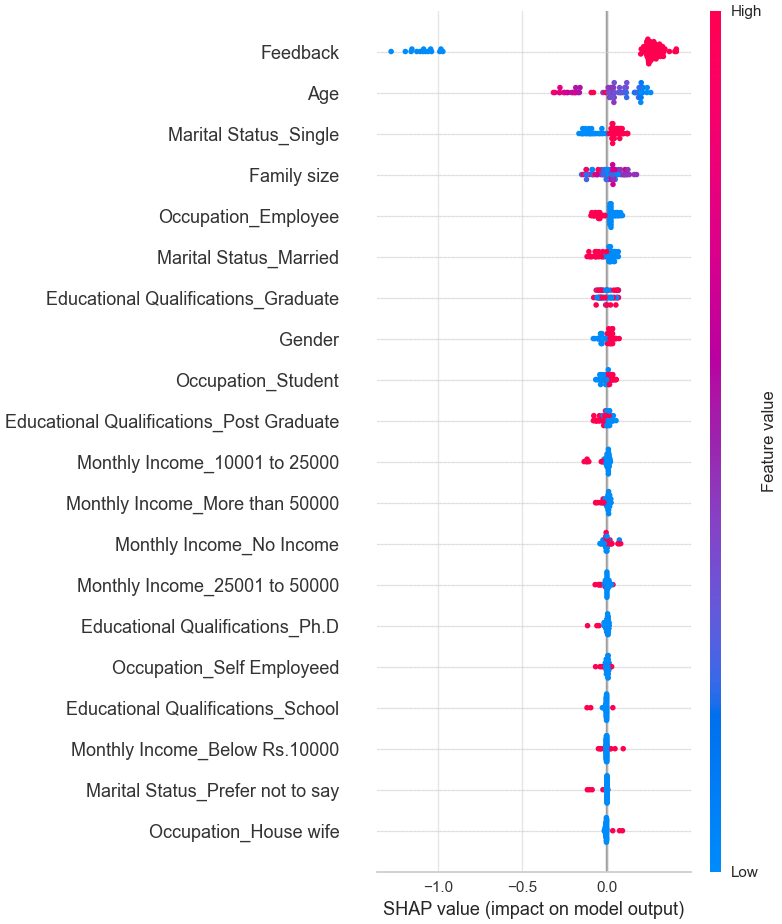

In [20]:
interpret_model(tuned_cb)

In [21]:
interpret_model(tuned_cb, plot = 'reason', observation = 1)